# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [683]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [443]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [444]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Высшее', 'Неоконченное высшее', 'Среднее', 'Ученая степень', 'Два и более высших образования', 'Среднее специальное', 'Неполное среднее'}


MARITAL_STATUS
{'Гражданский брак', 'Вдовец/Вдова', 'Состою в браке', 'Разведен(а)', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'Химия/Парфюмерия/Фармацевтика', 'Транспорт', 'Наука', 'Развлечения/Искусство', 'Сельское хозяйство', 'Энергетика', 'Здравоохранение', 'Логистика', 'Маркетинг', 'Туризм', 'ЧОП/Детективная д-ть', 'Торговля', 'Ресторанный бизнес/Общественное питание', 'Салоны красоты и здоровья', 'Недвижимость', 'Информационные услуги', 'Сборочные производства', 'Управляющая компания', 'Страхование', 'Банк/Финансы', 'Государственная служба', 'Нефтегазовая промышленность', 'Образование', 'Металлургия/Промышленность/Машиностроение', 'Другие сферы', 'Информационные технологии', 'Подбор персонала', 'Юридические услуги/нотариальные услуги', 'Строительство', 'СМИ/Реклама/PR-агенства', 'Коммунальное хоз-во/Дорожные службы'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [14]:
# посмотрим, какие поля у нас с пропусками  -- всего нашли 9 таких
df.isnull().sum()

AGREEMENT_RK                      0
TARGET                            0
AGE                               0
SOCSTATUS_WORK_FL                 0
SOCSTATUS_PENS_FL                 0
GENDER                            0
CHILD_TOTAL                       0
DEPENDANTS                        0
EDUCATION                         0
MARITAL_STATUS                    0
GEN_INDUSTRY                   2713
GEN_TITLE                      2713
ORG_TP_STATE                   2713
ORG_TP_FCAPITAL                2708
JOB_DIR                        2713
FAMILY_INCOME                     0
PERSONAL_INCOME                   0
REG_ADDRESS_PROVINCE              0
FACT_ADDRESS_PROVINCE             0
POSTAL_ADDRESS_PROVINCE           0
TP_PROVINCE                     590
REGION_NM                         2
REG_FACT_FL                       0
FACT_POST_FL                      0
REG_POST_FL                       0
REG_FACT_POST_FL                  0
REG_FACT_POST_TP_FL               0
FL_PRESENCE_FL              

In [178]:
df[['GEN_INDUSTRY','GEN_TITLE','ORG_TP_STATE','ORG_TP_FCAPITAL','JOB_DIR','TP_PROVINCE','REGION_NM', 
    'WORK_TIME','PREVIOUS_CARD_NUM_UTILIZED']].head()

#  PREVIOUS_CARD_NUM_UTILIZED (1,2,nan) - пустые строки заменить на 0

# ORG_TP_FCAPITAL - заменяем значения на 1 и 0; строки с пропусками удаляем

# GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, JOB_DIR, TP_PROVINCE, REGION_NM - удаляем строки с пропусками

,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,TP_PROVINCE,REGION_NM,WORK_TIME,PREVIOUS_CARD_NUM_UTILIZED
0,Образование,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,Красноярский край,ВОСТОЧНО-СИБИРСКИЙ,39.0,NaN
1,NaN,NaN,NaN,NaN,NaN,Орловская область,ЦЕНТРАЛЬНЫЙ 1,NaN,NaN
2,Металлургия/Промышленность/Машиностроение,Специалист,Частная компания,Без участия,Участие в основ. деятельности,Коми,ЦЕНТРАЛЬНЫЙ 2,156.0,NaN
3,Другие сферы,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,Читинская область,ВОСТОЧНО-СИБИРСКИЙ,9.0,NaN
4,Образование,Специалист,Государственная комп./учреж.,Без участия,Вспомогательный техперсонал,Хабаровский край,ДАЛЬНЕВОСТОЧНЫЙ,84.0,NaN


#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [492]:
# это поля - GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, JOB_DIR, TP_PROVINCE, REGION_NM 
#  закодировать их -1 (nan), 0, 1, ... , n (где n - число признаков)
for i in df.columns:
    if (df[i].dtype) == 'object':
        print(i)
        print(set(df[i]))
        print('\n')
    
# категориальные признаки  -- см код процедуры

    
# числовые поля, определившиеся как строки
# перекодируем в число, заменим запятую точкой
# PERSONAL_INCOME
# CREDIT
# FST_PAYMENT
# LOAN_AVG_DLQ_AMT
# LOAN_MAX_DLQ_AMT

EDUCATION
{'Высшее', 'Неоконченное высшее', 'Среднее', 'Ученая степень', 'Два и более высших образования', 'Среднее специальное', 'Неполное среднее'}


MARITAL_STATUS
{'Гражданский брак', 'Вдовец/Вдова', 'Состою в браке', 'Не состоял в браке', 'Разведен(а)'}


GEN_INDUSTRY
{nan, 'Химия/Парфюмерия/Фармацевтика', 'Транспорт', 'Наука', 'Развлечения/Искусство', 'Сельское хозяйство', 'Энергетика', 'Здравоохранение', 'Логистика', 'Маркетинг', 'Туризм', 'ЧОП/Детективная д-ть', 'Торговля', 'Ресторанный бизнес/Общественное питание', 'Салоны красоты и здоровья', 'Недвижимость', 'Управляющая компания', 'Сборочные производства', 'Информационные услуги', 'Страхование', 'Банк/Финансы', 'Государственная служба', 'Нефтегазовая промышленность', 'Образование', 'Металлургия/Промышленность/Машиностроение', 'Другие сферы', 'Информационные технологии', 'Подбор персонала', 'Юридические услуги/нотариальные услуги', 'Строительство', 'СМИ/Реклама/PR-агенства', 'Коммунальное хоз-во/Дорожные службы'}


GEN_TITLE


#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [493]:
def preproc_data(df_input):
    df_output = df.copy()#df_input.copy() 
    
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)
    df_output['WORK_TIME'] = df_output['WORK_TIME'].fillna(df_output.WORK_TIME.mean()) 
    
    df_output[['GEN_INDUSTRY', 'GEN_TITLE',  'ORG_TP_STATE',  'ORG_TP_FCAPITAL', 'JOB_DIR', 'TP_PROVINCE', 'REGION_NM']] = df_output[['GEN_INDUSTRY', 'GEN_TITLE',  'ORG_TP_STATE',  'ORG_TP_FCAPITAL', 'JOB_DIR', 'TP_PROVINCE', 'REGION_NM']].fillna('НУ')

  #  df_output = df_output.drop(['df_output'].isnull(), axis=0)
    
    # сделаем реплейсы для каждого из числовых полей, которые определились как строка
    # и сменим тип данных на float
    df_output['PERSONAL_INCOME'] = df['PERSONAL_INCOME'].map(lambda x: x.replace(',','.')).astype('float')
    df_output['CREDIT'] = df['CREDIT'].map(lambda x: x.replace(',','.')).astype('float')
    df_output['FST_PAYMENT'] = df['FST_PAYMENT'].map(lambda x: x.replace(',','.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',','.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',','.')).astype('float')
    
      
    # Заменим образование 1 и 0  - среднее, средне-специальное = 0, а остальные = 1
    df_output['EDUCATION'] = df_output['EDUCATION'].map(lambda x: 'Среднее' not in x).astype('int64')
    
    #df_output['ORG_TP_FCAPITAL'] = df_output['ORG_TP_FCAPITAL']
    # разбиваем доход на группы 1 и 0 
   # df_output['FAMILY_INCOME'] = df_output['FAMILY_INCOME'].map(lambda x: 'от 20000 до 50000 руб.' in x).astype('int64')
    
    # MARITAL_STATUS - меняем на: состою в браке = 1, остальное =0
    #df_output['MARITAL_STATUS'] = df_output['MARITAL_STATUS'].map(lambda x: 'Состою в браке' in x).astype('int64')
    
    # Преобразуем должность в (наиболее распространненная должност или нет = 1 или 0)
   # df_output['GEN_TITLE'] = df_output['GEN_TITLE'].isin(['Специалист','Рабочий']).astype('int64')
    
    # частная компания = 1, госы и прочие = 0
    #df_output['ORG_TP_STATE'] = df_output['ORG_TP_STATE'].isin(['Частная компания','Индивидуальный предприниматель', 'Частная ком. с инос. капиталом']).astype('int64')
    
    
    # убиваем колонки ИД и все, что касается идентификаторов и адресов
    df_output = df_output.drop(['AGREEMENT_RK','REG_ADDRESS_PROVINCE','FACT_ADDRESS_PROVINCE', 
                                'REGION_NM',  'TP_PROVINCE',
                                'POSTAL_ADDRESS_PROVINCE'], axis=1)        

    # все остальные get_dummies --  GEN_INDUSTRY, JOB_DIR,  TP_PROVINCE, REGION_NM
    df_output = pd.get_dummies(df_output,  columns=['ORG_TP_STATE', 'ORG_TP_STATE',  'MARITAL_STATUS', 'FAMILY_INCOME',
        'GEN_INDUSTRY', 'GEN_TITLE',  'ORG_TP_STATE', 'JOB_DIR', 'ORG_TP_FCAPITAL'])
      
    
    return df_output

In [494]:
# проверяем
preproc_data(df).head()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,PERSONAL_INCOME,REG_FACT_FL,...,JOB_DIR_НУ,JOB_DIR_Пр-техн. обесп. и телеком.,JOB_DIR_Реклама и маркетинг,JOB_DIR_Служба безопасности,JOB_DIR_Снабжение и сбыт,JOB_DIR_Участие в основ. деятельности,JOB_DIR_Юридическая служба,ORG_TP_FCAPITAL_Без участия,ORG_TP_FCAPITAL_НУ,ORG_TP_FCAPITAL_С участием
0,0,30,1,0,1,1,1,0,7000.0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,48,0,1,1,0,0,0,4100.0,1,...,1,0,0,0,0,0,0,0,1,0
2,0,35,1,0,0,1,0,0,40000.0,1,...,0,0,0,0,0,1,0,1,0,0
3,0,22,1,0,0,0,0,0,20000.0,1,...,0,0,0,0,0,1,0,1,0,0
4,0,27,1,0,1,2,2,1,17000.0,1,...,0,0,0,0,0,0,0,1,0,0


In [495]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [496]:
X = df_train_preproc.drop(['TARGET'], axis = 1)
X_test = df_test_preproc.drop(['TARGET'], axis = 1)
#   LOAN_AVG_DLQ_AMT    IS_OVERDUE
# целевоый признак - наличие просрочки у клиента
Y = df_train_preproc['TARGET'].astype('int64')
Y_test = df_test_preproc['TARGET'].astype('int64')

#### Задание 5. Обучение и оценка качества разных моделей

In [488]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42
X, X_test, Y, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [481]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression

In [635]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X, Y)
pred_dec = dtc.predict(X_test)
pred_dec_pb = dtc.predict_proba(X_test)

print('precision', precision_score(Y_test, pred_dec))
print('recall', recall_score(Y_test, pred_dec))
print('accuracy', accuracy_score(Y_test, pred_dec))
print('f1', f1_score(Y_test, pred_dec))
print('roc_auc', roc_auc_score(Y_test, pred_dec_pb[:,1]))

precision 0.16210840377921432
recall 0.18628571428571428
accuracy 0.7914822266934943
f1 0.17335814942834352
roc_auc 0.5291231003039514


In [636]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X, Y)
predict = rfc.predict(X_test)
predict_pb = rfc.predict_proba(X_test)

print('precision', precision_score(Y_test, predict))
print('recall', recall_score(Y_test, predict))
print('accuracy', accuracy_score(Y_test, predict))
print('roc_auc', roc_auc_score(Y_test, predict_pb[:,1]))

precision 0.13636363636363635
recall 0.005142857142857143
accuracy 0.8794097920858485
roc_auc 0.5931119843682153


In [637]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X, Y)
pred = lr.predict(X_test)
pred_pb = lr.predict_proba(X_test)

print('precision', precision_score(Y_test, pred))
print('recall', recall_score(Y_test, pred))
print('accuracy', accuracy_score(Y_test, pred))
print('roc_auc', roc_auc_score(Y_test, pred_pb[:,1]))

precision 0.25
recall 0.0034285714285714284
accuracy 0.8818242790073776
roc_auc 0.6563310464611376


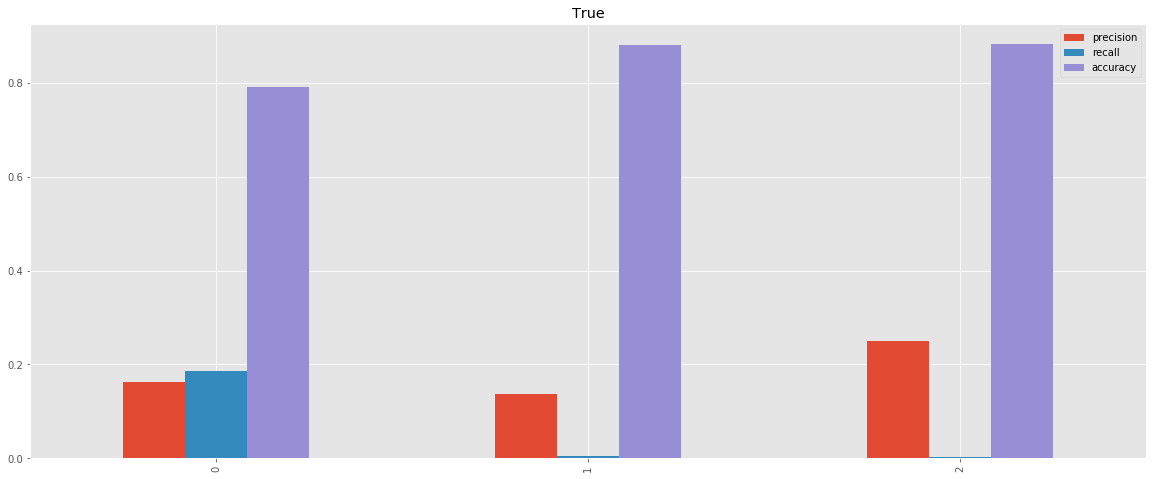

In [638]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)
import matplotlib.pyplot as plt
%matplotlib inline


plot_line = {'method': ['DecisionTreeClassifier','RandomForestClassifier','LogisticRegression'],
            'precision': [precision_score(Y_test, pred_dec), precision_score(Y_test, predict), precision_score(Y_test, pred)], 
             'recall':   [recall_score(Y_test, pred_dec), recall_score(Y_test, predict), recall_score(Y_test, pred)],  
             'accuracy': [accuracy_score(Y_test, pred_dec), accuracy_score(Y_test, predict), accuracy_score(Y_test, pred)] 
            }  

pll = pd.DataFrame(data=plot_line)

_, ax = plt.subplots(figsize=(20,8))
pll.plot(kind='bar',  ax=ax, title=True )
plt.show()
#precision_score(Y_test, pred_dec)
## Your Code Here


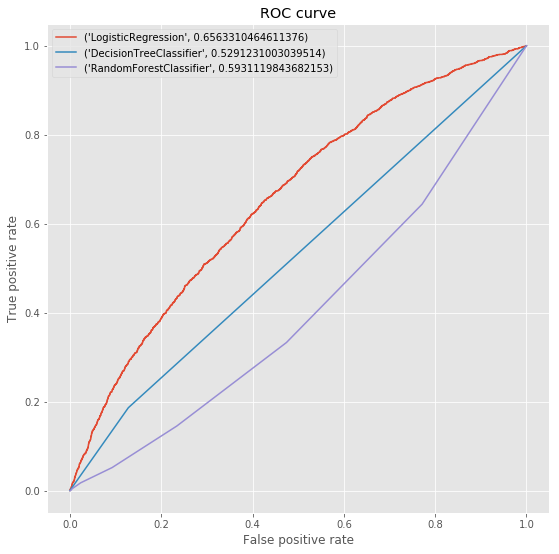

In [654]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой модели
from sklearn.metrics import roc_auc_score, roc_curve
#pred_dec_pb pred_pb    predict_pb    
plt.figure(figsize=(9, 9))

a, b, thresholds = roc_curve(Y_test, pred_dec_pb[:,1])
c, d, thresholds = roc_curve(Y_test, pred_pb[:,1])
e, f, thresholds = roc_curve(Y_test, predict_pb[:,1])

plt.plot(c, d, label=('LogisticRegression',roc_auc_score(Y_test, pred_pb[:,1])))
plt.plot(a, b, label=('DecisionTreeClassifier', roc_auc_score(Y_test, pred_dec_pb[:,1])) )
plt.plot(f, e, label=('RandomForestClassifier',roc_auc_score(Y_test, predict_pb[:,1])))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()


In [671]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
#cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

cross_val_score(
    dtc,
    X,
    Y,
    scoring='roc_auc',
    cv = 10
)

## Your Code Here

array([0.53183702, 0.5377527 , 0.54741658, 0.52441898, 0.51286044,
       0.49896383, 0.50081163, 0.50082811, 0.53426568, 0.51836883])

In [666]:

cross_val_score(
    rfc,
    X,
    Y,
    scoring='roc_auc',
    cv = 10
)


array([0.5947966 , 0.55242315, 0.6082498 , 0.59209339, 0.60373227,
       0.56530131, 0.54944978, 0.57921647, 0.61768862, 0.58085003])

In [667]:

cross_val_score(
    lr,
    X,
    Y,
    scoring='roc_auc',
    cv = 10

)


array([0.65398536, 0.65620211, 0.63346806, 0.65784584, 0.65035164,
       0.61487881, 0.61890401, 0.66398045, 0.65079247, 0.68080636])

In [669]:
print('LogisticRegression    ',roc_auc_score(Y_test, pred_pb[:,1]))
print('DecisionTreeClassifier', roc_auc_score(Y_test, pred_dec_pb[:,1])) 
print('RandomForestClassifier',roc_auc_score(Y_test, predict_pb[:,1]))

LogisticRegression     0.6563310464611376
DecisionTreeClassifier 0.5291231003039514
RandomForestClassifier 0.5931119843682153


In [678]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_test, Y_test)
pred_pb = lr.predict_proba(X_test)
pred_pb
## Your Code Here

array([[0.73136314, 0.26863686],
       [0.92762421, 0.07237579],
       [0.9412828 , 0.0587172 ],
       ...,
       [0.72033114, 0.27966886],
       [0.94164616, 0.05835384],
       [0.70588994, 0.29411006]])

In [682]:
# Померить roc_auc на тесте
roc_auc_score(Y_test, pred_pb[:,1])


0.6056507164567955